<a href="https://colab.research.google.com/github/Pesanas/ciencia-de-dados-adult/blob/master/ciencia_de_dados_adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
adult_kaggle = pd.read_csv('https://raw.githubusercontent.com/Pesanas/ciencia-de-dados-adult/master/adult%20kaggle.csv')
adult_diogo = pd.read_csv('https://raw.githubusercontent.com/Pesanas/ciencia-de-dados-adult/master/adult%20diogo.csv')
adult = pd.read_csv('https://raw.githubusercontent.com/Pesanas/ciencia-de-dados-adult/master/adult_csv.csv')

In [ ]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [ ]:
adult_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
adult_kaggle.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
adult_diogo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            48842 non-null  int64 
 1   age              48842 non-null  int64 
 2   workclass        46043 non-null  object
 3   fnlwgt           48842 non-null  int64 
 4   education        48842 non-null  object
 5   educational-num  48842 non-null  int64 
 6   marital-status   48842 non-null  object
 7   occupation       46033 non-null  object
 8   relationship     48842 non-null  object
 9   race             48842 non-null  object
 10  gender           48842 non-null  object
 11  capital-gain     48842 non-null  int64 
 12  capital-loss     48842 non-null  int64 
 13  hours-per-week   48842 non-null  int64 
 14  native-country   47985 non-null  object
 15  income           48842 non-null  object
dtypes: int64(7), object(9)
memory usage: 6.0+ MB


In [ ]:
adult_diogo.head()

,index,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


Andrey Rayanovsky nascido na Russia, vivenciou a Revolução Russa em 1917 e viu a União Soviética se tornar o primeiro país socialista do mundo, Andrey não apoiava o socialismo pois defendia que grandes homens podem traçar seu próprio caminho, revoltado com a situação de seu pais mudou seu nome para Andrew Ryan e migrou para os Estados Unidos, Andrew defende inclusive que você não pode depender de outra pessoa, um parceiro, e deve traçar seu caminho você próprio, com essa afirmação vamos analisar o gráfico a seguir:

Quantidade de pessoas que conseguiram fazer 50mil ao ano solteiras, em relação a quantidade de pessoas que conseguiram fazer 50mil ao ano casadas:

Conclusão:

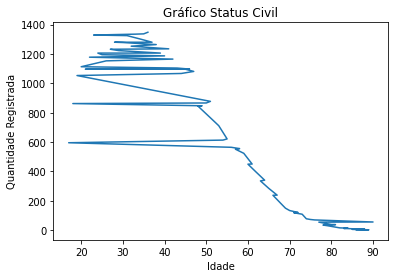

In [ ]:
plt.plot(adult_kaggle['age'].value_counts())
plt.title('Gráfico Status Civil')
plt.xlabel('Idade')
plt.ylabel('Quantidade Registrada')
plt.show()

Como o filme de 2004 "13 Going On 30" defendia, 30 é a idade do sucesso, com essa afirmação vamos começar o aquecimento com gráficos:

Quantidade de homens que conseguiram fazer 50mil ao ano com de 30 anos de idade em relação a quantidade de mulheres que conseguiram fazer 50mil ao ano com de 30 anos de idade:

Conclusão:

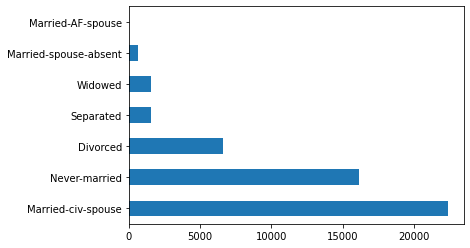

In [ ]:
adult['marital-status'].value_counts().plot.barh(stacked=True)
plt.show()

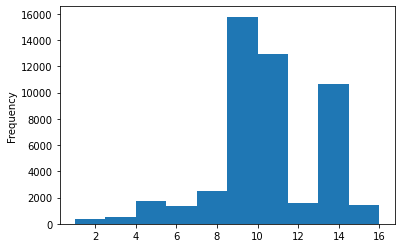

In [ ]:
adult['education-num'].plot(kind='hist')
plt.show()